# Question-1
Write a Python code to build a deep neural network using Keras and compute a number of parameters, memory and FLOPs for the following model. Use relu activations functions in the hidden layers and sigmoid activations function in the output layers.


CPU that performs 1 GFLOPS (1,000,000,000) per seconds and computes the inference time of the Deep neural network model.



<img src="2.png" width="700" height="500">


##  Parameters calculation in Deep neural network 

The number of internal parameters in a neural network is the total number of weights + the total number of biases. The total number of weights equals the sum of the products of each pair of adjacent layers. The total number of biases equals the number of hidden neurons + the number of output neurons.

## Model Size calculations


Model Size (in bytes)=Number of Parameters×Bytes Per Parameter
Model Size (in KB)=Model Size (in bytes)/1024 

##  FLOPs calculation in Deep neural network 
FLOPs of  FC=2*(input size x output size )+(output size x activation)

## Activation functions FLOPS for  Tensor Flow

Relu  -->      1FLOPs

Sigmoid   -->   1FLOPs

Tanh   -->      1FLOPs

Softmax    -->  6FLOPs

## Infrences time calculations 

The inference time = FLOPs/FLOPS.

FLOPs-> measures computational complexity of the model.

FLOPS-> measures the hardware’s processing capability



In [1]:
### Write  your code here 
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


In [2]:
# Function to compute number of parameters, FLOPs, and memory usage
def compute_model_metrics(model, input_shape, dtype_size=4):
    """
    Compute the number of parameters, FLOPs, and memory usage for a given model.

    Args:
        model: tf.keras.Model - The model for which metrics are computed.
        input_shape: tuple - Shape of the model input.
        dtype_size: int - Size of the data type (default is 4 bytes for float32).

    Returns:
        num_params: int - Total number of parameters in the model.
        flops: int - Total floating point operations (FLOPs) for the model.
        memory: int - Memory required in bytes.
    """
    # Create a random input tensor of the same shape as the model input
    input_data = tf.random.normal([1] + list(input_shape))  # batch size of 1

    # Get the number of parameters
    num_params = model.count_params()

    # Create a concrete function of the model
    concrete_func = tf.function(model).get_concrete_function(input_data)

    # Convert the Keras model to a frozen ConcreteFunction
    frozen_func = convert_variables_to_constants_v2(concrete_func)

    # Profile the model to compute FLOPs
    run_meta = tf.compat.v1.RunMetadata()
    opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
    flops = tf.compat.v1.profiler.profile(
        graph=frozen_func.graph, run_meta=run_meta, options=opts
    ).total_float_ops

    # Compute memory requirements (sum over all model variables)
    memory = sum([tf.size(var).numpy() for var in model.trainable_variables]) * dtype_size

    return num_params, flops, memory


In [3]:
model = Sequential([
    Dense(100, activation="relu", input_shape=(50,)),
    Dense(1, activation="relu"),
    Dense(100, activation="relu"),
    Dense(50, activation="sigmoid")
])

# Display model summary
model.summary()

c:\Users\DELL\.conda\envs\StreamlistTest\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
n1, f1, m1 = compute_model_metrics(model, input_shape=(50,), dtype_size=4)
print("Number of parameters:", n1)
print("Number of FLOPs:", f1)
print("Amount of memory (bytes):", m1)



Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.
Number of parameters: 10451
Number of FLOPs: 20651
Amount of memory (bytes): 41804


In [5]:
model.save("model1.h5")

# Question-2
Write a Python code to build a deep neural network using Keras and compute a number of parameters, memory and FLOPs for the following model. Use relu activations functions in the hidden layers and softmax activations function in the output layers. Write a Python code plot  the bar graph of the question 1 and question 2 output and compare.



<img src="1.png" width="700" height="500">

In [11]:
### Write  your code here 
model2 = Sequential([
    Dense(100, activation="relu", input_shape=(50,)),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
])
model2.summary()

c:\Users\DELL\.conda\envs\StreamlistTest\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,974 (54.59 KB)

 Trainable params: 13,974 (54.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
n2, f2, m2 = compute_model_metrics(model2, input_shape=(50,), dtype_size=4)
print("Number of parameters:", n2)
print("Number of FLOPs:", f2)
print("Amount of memory (bytes):", m2)

Number of parameters: 13974
Number of FLOPs: 27792
Amount of memory (bytes): 55896


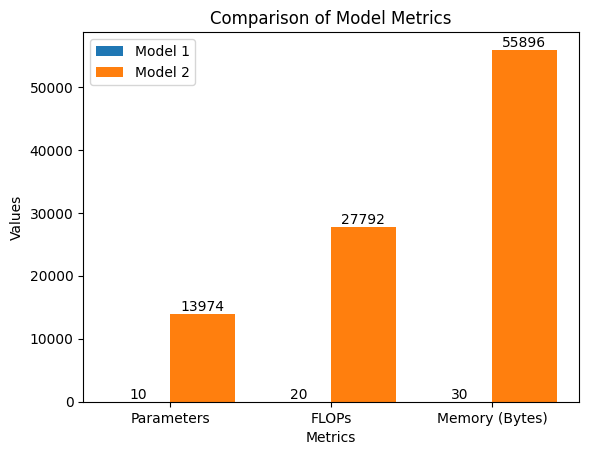

In [13]:
import matplotlib.pyplot as plt

# Data for plotting
metrics = ['Parameters', 'FLOPs', 'Memory (Bytes)']
model1_values = [n1, f1, m1]
model2_values = [n2, f2, m2]

# Bar plot
x = range(len(metrics))
bars1 = plt.bar([i - 0.2 for i in x], model1_values, width=0.4, label='Model 1', align='center')
bars2 = plt.bar([i + 0.2 for i in x], model2_values, width=0.4, label='Model 2', align='center')

# Adding labels and title
plt.xticks(x, metrics)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Model Metrics')
plt.legend()

# Add values on top of the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(yval), ha='center', va='bottom')

# Show the plot
plt.show()


In [14]:
model.save("model2.h5")

## Output Dimensions Formula for 2D Convolution 
<img src="10.png" width="600" height="400">

## Parameter calculation of 2DCNN


<img src="4.png" width="400" height="200">

## FLOPs calculation of 2DCNN
<img src="6.png" width="600" height="400">



## FLOPs calculation for Pooling Layers
<img src="12.png" width="600" height="400">


# Question-3

Write a Python code build 2DCNN model for the following specifications using Keras and compute the number of parameters ,model size and FLOPs

The model architecture consists of several layers designed for image classification tasks, such as recognizing digits from the MNIST dataset. The architecture begins with a 2D convolutional layer (Conv2D), which applies 32 filters of size 3x3 to the input image (28x28x1), followed by the ReLU activation function to introduce non-linearity. This is followed by a max-pooling layer (MaxPooling2D) with a pool size of 2x2, reducing the spatial dimensions of the feature maps while retaining important information. A second convolutional layer with 64 filters of size 3x3 is then applied, again using ReLU activation. Another max-pooling layer  (2x2 ) follows to further downsample the feature maps. The output of the convolutional layers is then flattened into a one-dimensional vector using the Flatten layer, which is fed into the fully connected dense layers. The first dense layer has 64 neurons with ReLU activation, allowing the model to learn complex representations, while the final dense layer has 10 neurons with a softmax activation function, providing probabilities for each of the 10 possible digit classes.


In [15]:
### Write  your code here 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv3D

# 2D CNN model
CNNmodel = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Display model summary
CNNmodel.summary()

c:\Users\DELL\.conda\envs\StreamlistTest\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
n, f, m = compute_model_metrics(CNNmodel, input_shape=(28, 28, 1), dtype_size=4)
print("Number of parameters:", n)
print("Number of FLOPs:", f)
print("Amount of memory (bytes):", m)

Number of parameters: 121930
Number of FLOPs: 5113532
Amount of memory (bytes): 487720


In [17]:
model.save("model3.h5")

# Question-4
Write a Python code to build CNN using Keras and compute a  number of parameters,memory and FLOPs for the following model.





<img src="3.jpg" width="900" height="700">

In [18]:
### Write  your code here 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
CNNmodel2 = Sequential([
    # Layer 1: Convolution and Pooling
    Conv2D(filters=32, kernel_size=(3, 3), activation='softmax', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Layer 2: Convolution and Pooling
    Conv2D(filters=64, kernel_size=(3, 3), activation='softmax'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output
    Flatten(),

    # Fully Connected Layer 3
    Dense(64, activation='softmax'),

    # Fully Connected Layer 4 (Output layer)
    Dense(10, activation='softmax')
])

# Summary of the model
CNNmodel2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
n, f, m = compute_model_metrics(CNNmodel2, input_shape=(32, 32, 3), dtype_size=4)
print("Number of parameters:", n)
print("Number of FLOPs:", f)
print("Amount of memory (bytes):", m)

Number of parameters: 167562
Number of FLOPs: 8357564
Amount of memory (bytes): 670248


In [20]:
model.save("model4.h5")

## Output Shape of 3DCNN

<img src="13.png" width="400" height="300">
<img src="14.png" width="400" height="300">






### 3DCNN parameters calculations
<img src="7.png" width="900" height="700">


### 3DCNN FLOPs calculations

<img src="8.png" width="900" height="700">



### 3DCNN FLOPs calculation for Pooling Layers 
<img src="15.png" width="900" height="700">


# Question-5

You are tasked with designing a 3D Convolutional Neural Network (3D CNN) to classify video clips into one of five categories, such as walking, running, jumping, swimming, and cycling. Each video clip consists of 16 frames of size 64x64, and the data has a single channel (grayscale). The model should include two 3D convolutional layers followed by max-pooling layers, a flattening layer, and fully connected dense layers. Specifically, the architecture should satisfy the following requirements:

The input layer should accept a shape of (16, 64, 64, 1) corresponding to the temporal, height, width, and channel dimensions.
The first 3D convolutional layer should have 32 filters of size (3, 3, 3) and use ReLU activation.
The first max-pooling layer should have a pool size of (2, 2, 2) to downsample the feature maps.
The second 3D convolutional layer should have 64 filters of size (3, 3, 3) and use ReLU activation.
The second max-pooling layer should again have a pool size of (2, 2, 2).
The flattened layer should connect to a dense layer with 128 neurons using ReLU activation, followed by the output layer with 5 neurons and a softmax activation.
Design and implement this 3D CNN architecture, compute the number of parameters for each layer, compute the model size and compute the FLOPs.







In [21]:
### Write  your code here 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense

# Define the 3D CNN model
model_3DCNN = Sequential([
    # First 3D Convolutional Layer
    Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu', input_shape=(16, 64, 64, 1)),
    MaxPooling3D(pool_size=(2, 2, 2)),

    # Second 3D Convolutional Layer
    Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),

    # Flatten Layer
    Flatten(),

    # Fully Connected Dense Layer
    Dense(128, activation='relu'),

    # Output Layer
    Dense(5, activation='softmax')
])

# Summary of the model
model_3DCNN.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 14, 62, 62, 32) │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 7, 31, 31, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 5, 29, 29, 64)  │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 2, 14, 14, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,268,293 (12.47 MB)

 Trainable params: 3,268,293 (12.47 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
n,f,m=compute_model_metrics(model_3DCNN, input_shape=(16, 64, 64, 1), dtype_size=4)
print("Number of parameters",n)
print("Number of FLOPs",f)
print("Amount of memory",m)

Number of parameters 3268293
Number of FLOPs 566448606
Amount of memory 13073172


In [23]:
model.save("model5.h5")

# Question-6

A company is building a system to predict customer sentiment (positive or negative) based on a sequence of customer reviews. 
Each review is represented as a feature vector of size 4, where each feature corresponds to a specific aspect of the review, such as tone, length, and keyword presence. To process this sequential data, the team decides to use a Recurrent Neural Network (RNN).

The input size n<sub>x</sub> is 4, meaning each input vector x<sup>t</sup> has 4 features.  
The hidden layer has 3 hidden units n<sub>a</sub>=3.  
The output size n<sub>y</sub> is 2, corresponding to the two possible sentiment classes (positive or negative).  
The sequence length T<sub>x</sub> is 5, meaning the RNN will process a sequence of 5 reviews at a time.
use sigmoid activation functions in the output layers and compute the number of parameters and memory in the RNN model.




<img src="9.png" width="300" height="100">


Number of parameter of RNN = g × [a(a+i) + a]

a --> hidden unit

i ---> input unit



In [24]:
### Write  your code here 
### Write  your code here 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the RNN model
model_RNN = Sequential([
    SimpleRNN(units=3, input_shape=(5, 4), return_sequences=False),
    Dense(2, activation='sigmoid')
])
model_RNN.summary()

c:\Users\DELL\.conda\envs\StreamlistTest\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 3)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 32 (128.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.save("model6.h5")

# Question 7

Write a Python code to implement a single LSTM unit for the follwoing and compute the parameter of the follwoing model using Keras.
    
<img src="https://github.com/kmkarakaya/ML_tutorials/blob/master/images/LSTM_internal2.png?raw=true" width="500">


 Notice that we can guess the size (shape) of W,U and b given:
 * Input size ($h_{t-1}$ and $x_{t}$ )
 * Output size ($h_{t-1}$)

 Since output must equal to Hidden State (hx1) size:

  * for W param =  ($h$ × $x$)
  * for U param =  ($h$ × $h$)
  * for Biases  param =   $h$

 * total params = W param + U param + Biases param
  
    =  ($h$ × $x$) +  ($h$ × $h$) +  $h$

    =  ( ($h$ × $x$) +  ($h$ × $h$) +   $h$ )

    =  ( ($x$ + $h$) ×  $h$  +   $h$ )

* there are 4 functions which are exactly defined in the same way, in the LSTM layer, there will be

 ##   **LSTM parameter number = 4 × (($x$ + $h$) × $h$ +$h$)**



In [26]:
### Write  your code here 
from keras.models import Sequential
from keras.layers import LSTM

# Define input and hidden sizes
input_size = 5  # x
hidden_size = 3  # h

# Build the LSTM layer
model = Sequential([
    LSTM(hidden_size, input_shape=(1, input_size))  # Single LSTM unit
])

# Display the model summary to get the total parameters
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3)              │           108 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108 (432.00 B)

 Trainable params: 108 (432.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
input_size = 5  # x
hidden_size = 3  # h
lstm_params = 4 * ((input_size + hidden_size) * hidden_size + hidden_size)
print(f"Calculated total LSTM parameters: {lstm_params}")

Calculated total LSTM parameters: 108


In [28]:
model.save("model7.h5")